In [2]:
import torch

model = torch.load(open("models/model.pkl", "rb"), weights_only=False)
model

FrameReconstructionModel(
  (attn): MultiScaleTemporalAttention(
    (attention_layers): ModuleList(
      (0-3): 4 x MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
      )
    )
  )
  (reconstructor): CNNFrameReconstructor(
    (fc): Linear(in_features=768, out_features=100352, bias=True)
    (decoder): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (5): ReLU(inplace=True)
      (6): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (7): Sigmoid()
    )
  )
)

In [7]:
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader

from models import FrameReconstructionModel
from dataset import ImageDataset, EmbeddingDataset, ImageEmbeddingDataset

root_dir = "data/UCSDped1/Train"
seq_len = 50

device = torch.device(
    "cuda" if torch.cuda.is_available() else "cpu"
)

image_dataset = ImageDataset(
    root_dir=root_dir,
    seq_len=seq_len
)
embedding_dataset = EmbeddingDataset(
    embeddings_path="embeddings/embeddings_50.pkl"
)

dataset = ImageEmbeddingDataset(
    image_dataset=image_dataset,
    embedding_dataset=embedding_dataset
)
dataloader = DataLoader(dataset, batch_size=12)

data = next(iter(dataloader))

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

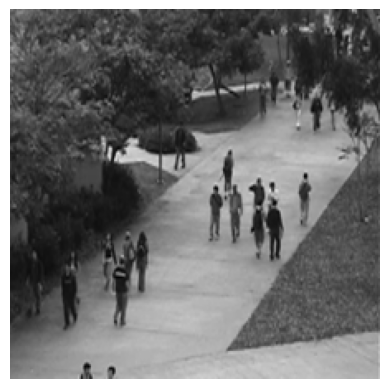

In [8]:
import matplotlib.pyplot as plt

plt.imshow(data[1][0][0].permute((1, 2, 0)))
plt.axis('off')

In [9]:
out = model(data[0])
out.shape

torch.Size([12, 50, 3, 224, 224])

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

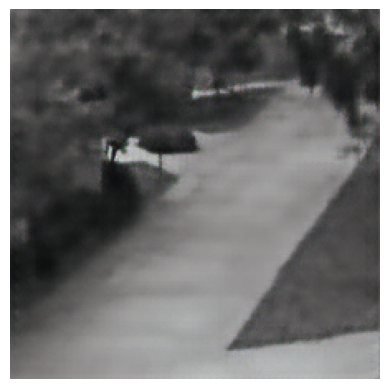

In [12]:
plt.imshow(out[0][0].detach().permute((1, 2, 0)))
plt.axis('off')

In [24]:
def visualize_images(data, out, index):
    ground_truth = data[1][0][index].permute((1, 2, 0))
    reconstructed = out[0][index].permute((1, 2, 0))

    plt.subplot(1, 2, 1)
    plt.imshow(ground_truth)
    plt.axis('off')
    plt.title("Original Frame")

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed.detach())
    plt.axis('off')
    plt.title("Reconstructed")

    plt.show()

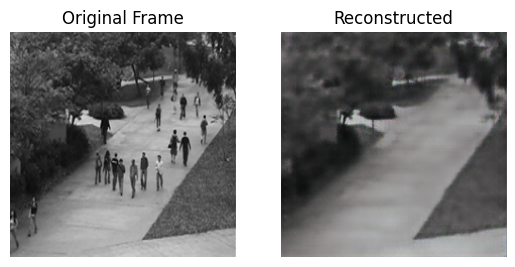

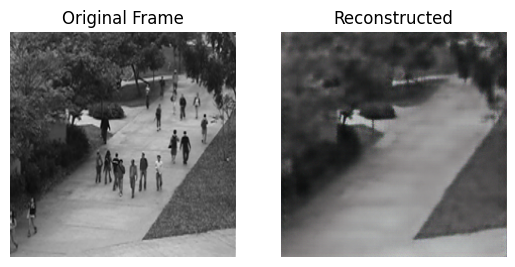

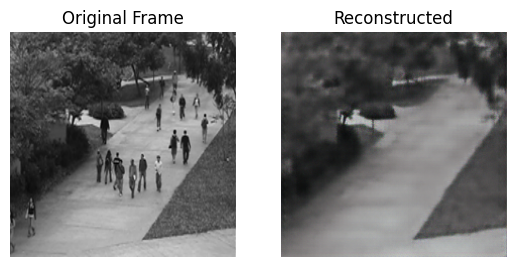

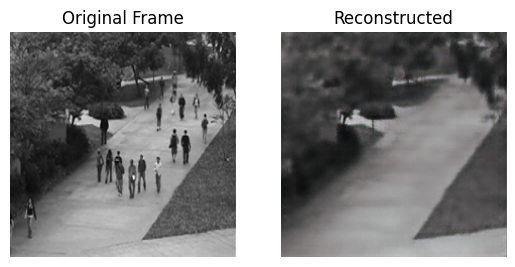

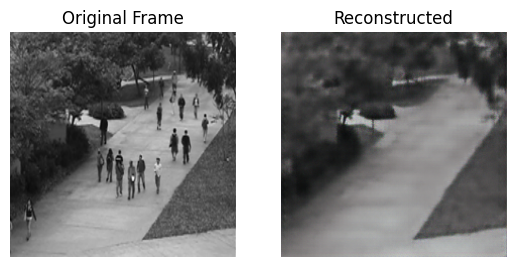

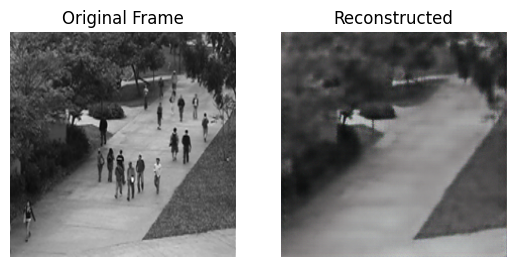

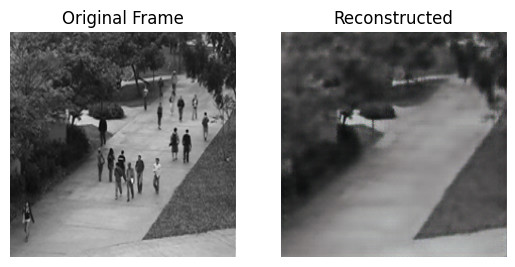

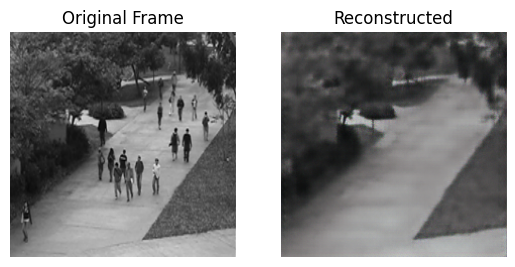

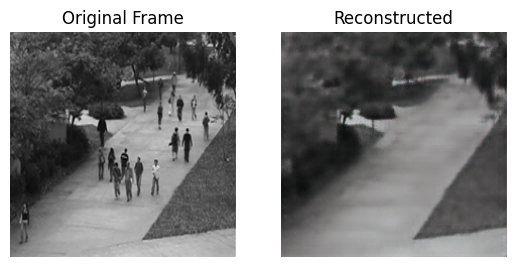

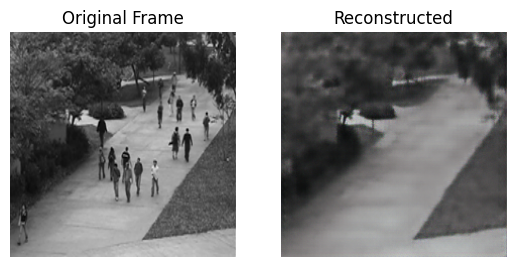

In [28]:
for i in range(40, 50):
    visualize_images(data, out, i)